In [1]:
import pandas as pd
import seaborn as sns
import datetime as datetime
import warnings
import numpy as np 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#updated data: https://www.illinoispolicy.org/what-you-need-to-know-about-coronavirus-in-illinois/

In [2]:
import pandas as pd
#https://covidtracking.com/data/download
test_stats = pd.read_csv('https://covidtracking.com/data/download/illinois-history.csv')

In [3]:
test_stats.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,IL,23014.0,20763.0,12,2251.0,NaN,NaN,1141.0,0,...,18640190.0,68094,NaN,NaN,NaN,NaN,NaN,0,18640190.0,68094
1,2021-03-06,IL,23002.0,20750.0,56,2252.0,NaN,NaN,1210.0,0,...,18572096.0,79248,NaN,NaN,NaN,NaN,NaN,0,18572096.0,79248
2,2021-03-05,IL,22946.0,20700.0,44,2246.0,NaN,NaN,1166.0,0,...,18492848.0,103336,NaN,NaN,NaN,NaN,NaN,0,18492848.0,103336
3,2021-03-04,IL,22902.0,20668.0,49,2234.0,NaN,NaN,1200.0,0,...,18389512.0,73990,NaN,NaN,NaN,NaN,NaN,0,18389512.0,73990
4,2021-03-03,IL,22853.0,20626.0,50,2227.0,NaN,NaN,1260.0,0,...,18315522.0,80854,NaN,NaN,NaN,NaN,NaN,0,18315522.0,80854


In [5]:
test_stats = test_stats.sort_values(by = 'date')
test_stats.positive

368          4
367          5
366          5
365          6
364          6
        ...   
4      1191520
3      1193260
2      1194702
1      1197267
0      1198335
Name: positive, Length: 369, dtype: int64

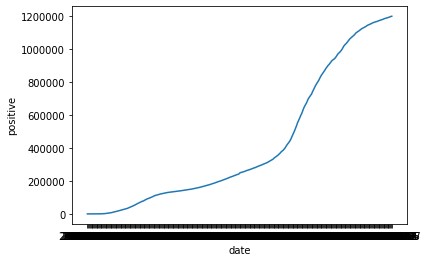

In [6]:
sns.lineplot(x="date", y="positive", data=test_stats)

In [7]:
test_stats['logCases']=np.log(test_stats['positive'])

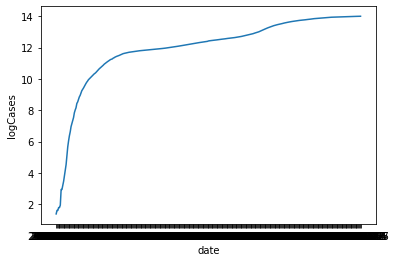

In [8]:
sns.lineplot(x="date", y="logCases", data=test_stats)

In [9]:
test_stats = test_stats[["date", "positiveIncrease", "hospitalizedCurrently", "onVentilatorCurrently", "totalTestResultsIncrease", "deathIncrease"]]


In [10]:
test_stats = test_stats.sort_values(by = 'date')
test_stats = test_stats.reset_index()

In [11]:
test_stats

,index,date,positiveIncrease,hospitalizedCurrently,onVentilatorCurrently,totalTestResultsIncrease,deathIncrease
0,368,2020-03-04,0,NaN,NaN,0,0
1,367,2020-03-05,1,NaN,NaN,0,0
2,366,2020-03-06,0,NaN,NaN,0,0
3,365,2020-03-07,1,NaN,NaN,0,0
4,364,2020-03-08,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...
364,4,2021-03-03,2104,1260.0,138.0,80854,50
365,3,2021-03-04,1740,1200.0,128.0,73990,49
366,2,2021-03-05,1442,1166.0,121.0,103336,44
367,1,2021-03-06,2565,1210.0,108.0,79248,56


In [12]:
pos_rate = test_stats['positiveIncrease']/test_stats['totalTestResultsIncrease']
print(pos_rate[130:])

130    0.024528
131    0.029422
132    0.024854
133    0.031105
134    0.029228
         ...   
364    0.026022
365    0.023517
366    0.013954
367    0.032367
368    0.015684
Length: 239, dtype: float64


In [13]:
pos_rate[-7:].sum()/7

0.023811117572319924

In [14]:
test_stats['pos_rate'] = pos_rate

In [15]:
test_stats['state'] = 'Illinois'

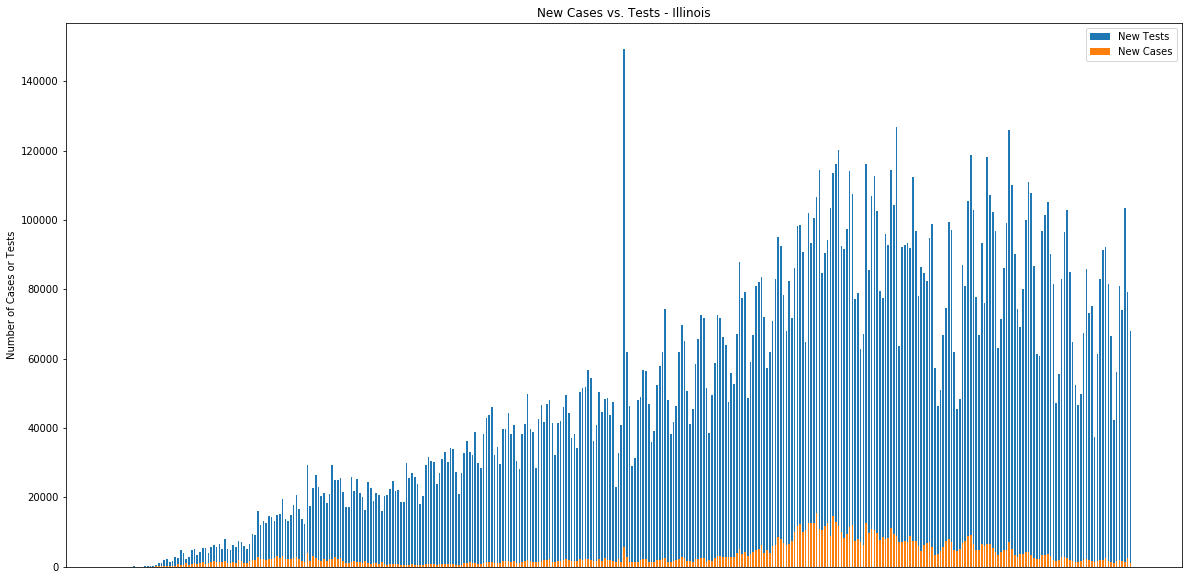

<Figure size 432x288 with 0 Axes>

In [16]:
import numpy as np
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,10))
width = .6

ax.bar(test_stats.date, test_stats.totalTestResultsIncrease, width, label='New Tests')
ax.bar(test_stats.date, test_stats.positiveIncrease, width, label="New Cases")
ax.set_ylabel("Number of Cases or Tests")
ax.set_title("New Cases vs. Tests - Illinois")

ax.legend()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.show()
plt.savefig('cases_versus_tests.png')

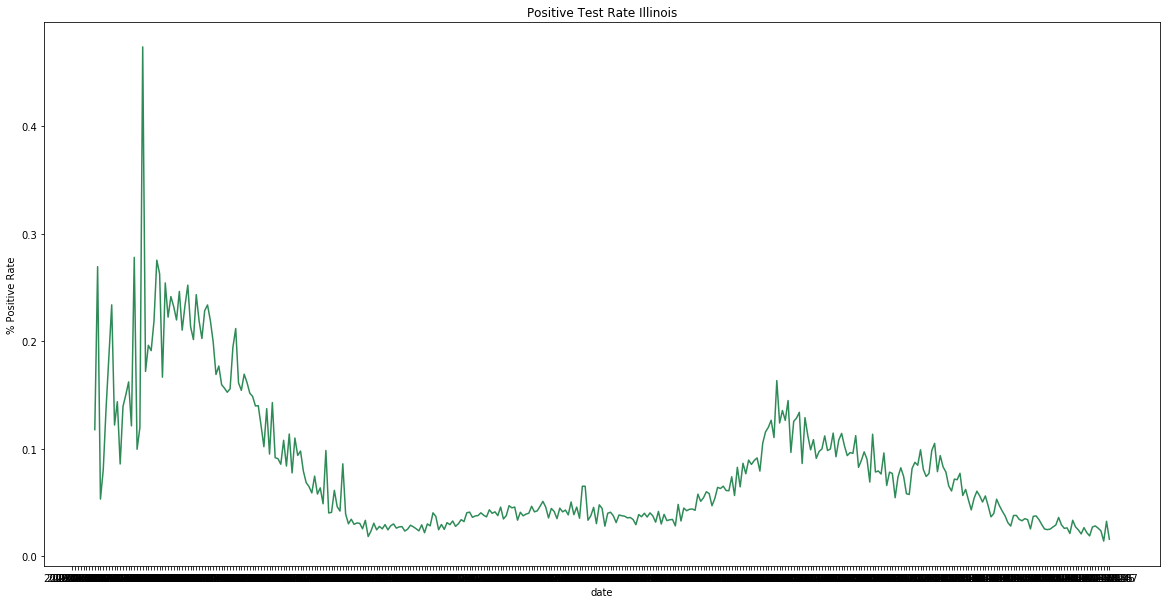

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(20,10))

sns.lineplot(x = test_stats["date"], y = test_stats['positiveIncrease']/test_stats['totalTestResultsIncrease'][8:], 
                  color = "seagreen").set_title('Positive Test Rate Illinois')

plt.ylabel("% Positive Rate")
plt.show(fig)
plt.savefig('positive_rate.png')

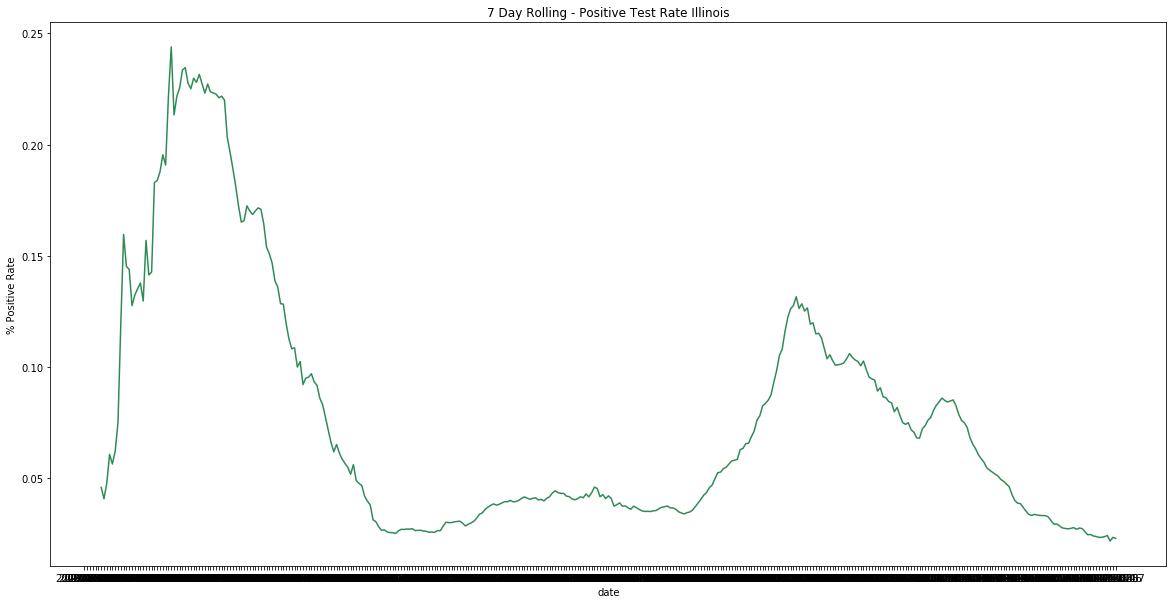

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(20,10))

sns.lineplot(x = test_stats["date"], 
             y =  test_stats['positiveIncrease'].rolling(7).mean()/test_stats['totalTestResultsIncrease'].rolling(7).mean(), 
                  color = "seagreen").set_title('7 Day Rolling - Positive Test Rate Illinois')

plt.ylabel("% Positive Rate")
plt.show(fig)
plt.savefig('positive_rate.png')

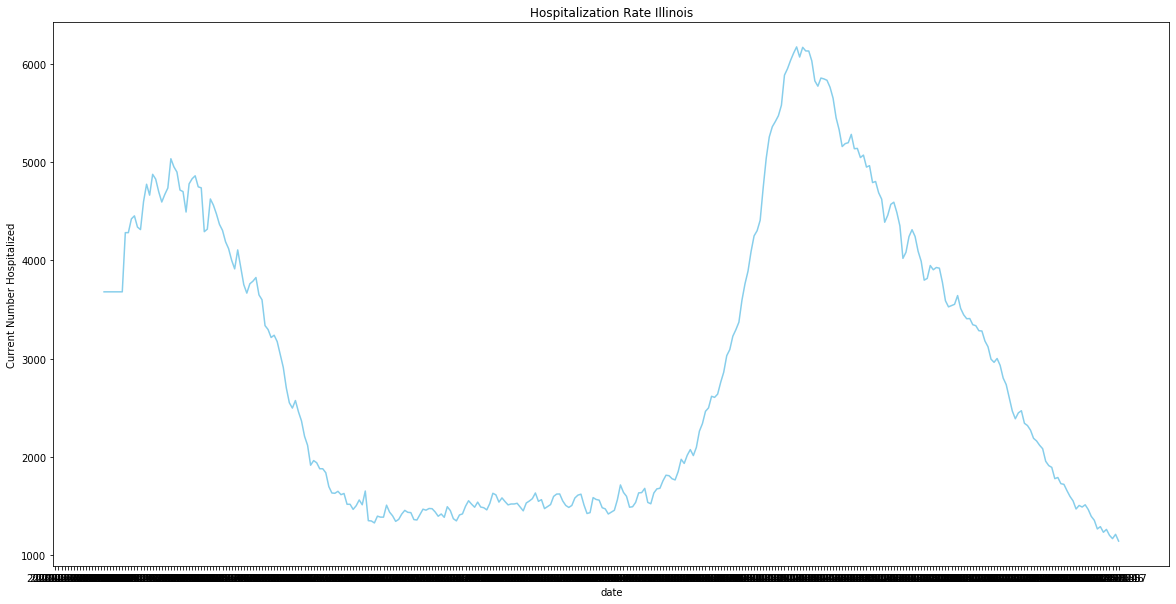

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(20,10))

sns.lineplot(x = test_stats["date"], y = test_stats["hospitalizedCurrently"], 
             color = "skyblue").set_title('Hospitalization Rate Illinois')

plt.ylabel("Current Number Hospitalized")
plt.show(fig)
plt.savefig('hospitalized.png')

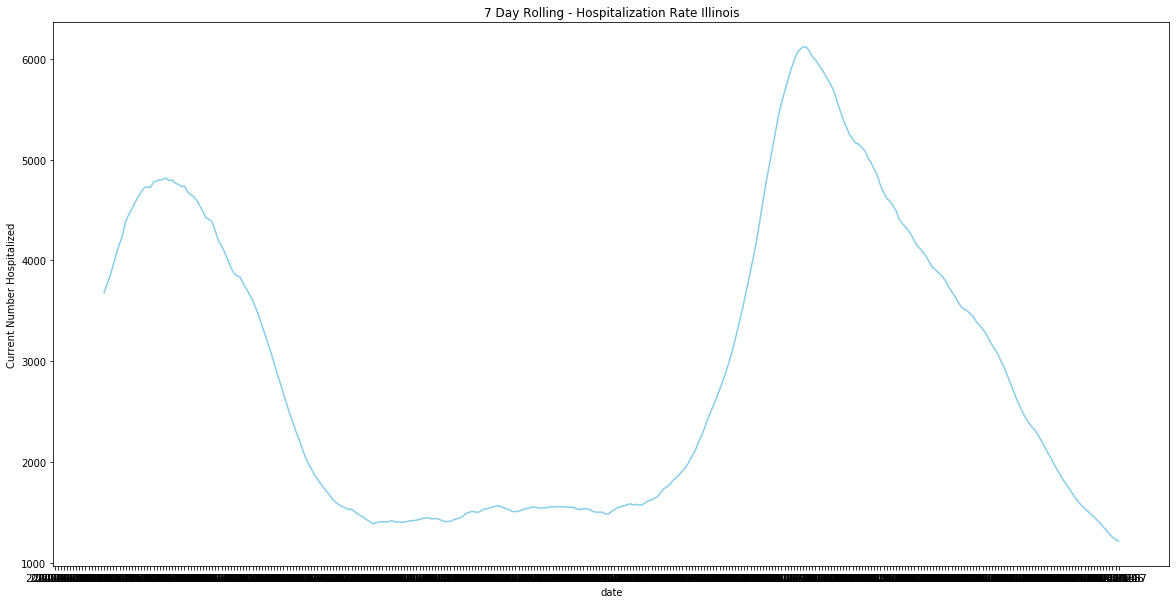

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(20,10))

sns.lineplot(x = test_stats["date"], y = test_stats["hospitalizedCurrently"].rolling(7).mean(), 
             color = "skyblue").set_title('7 Day Rolling - Hospitalization Rate Illinois')

plt.ylabel("Current Number Hospitalized")
plt.show(fig)
plt.savefig('hospitalized.png')

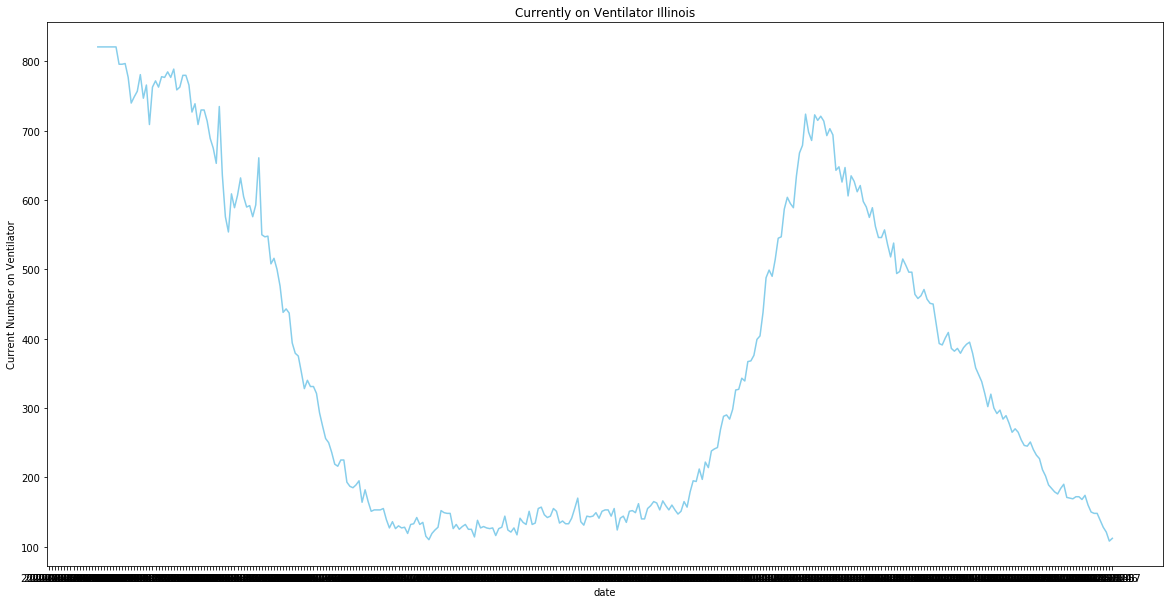

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x = test_stats["date"], y = test_stats['onVentilatorCurrently'], 
             color = "skyblue").set_title('Currently on Ventilator Illinois')

plt.ylabel("Current Number on Ventilator")
plt.show(fig)
plt.savefig('ventilator.png')

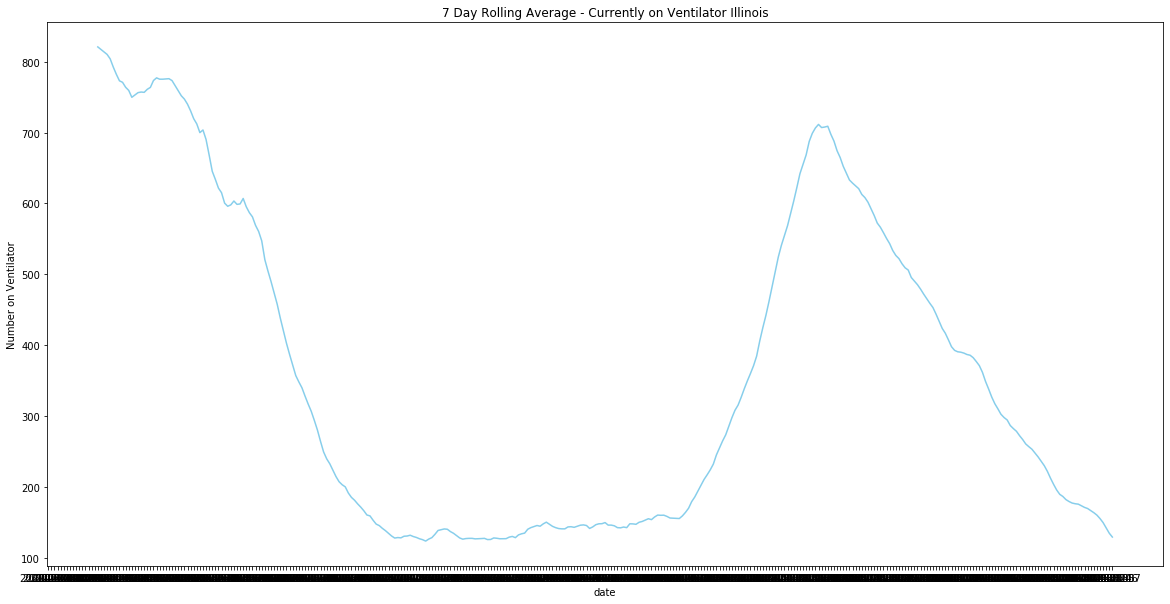

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x = test_stats["date"], y = test_stats['onVentilatorCurrently'].rolling(7).mean(), 
             color = "skyblue").set_title('7 Day Rolling Average - Currently on Ventilator Illinois')

plt.ylabel("Number on Ventilator")
plt.show(fig)
plt.savefig('ventilator.png')

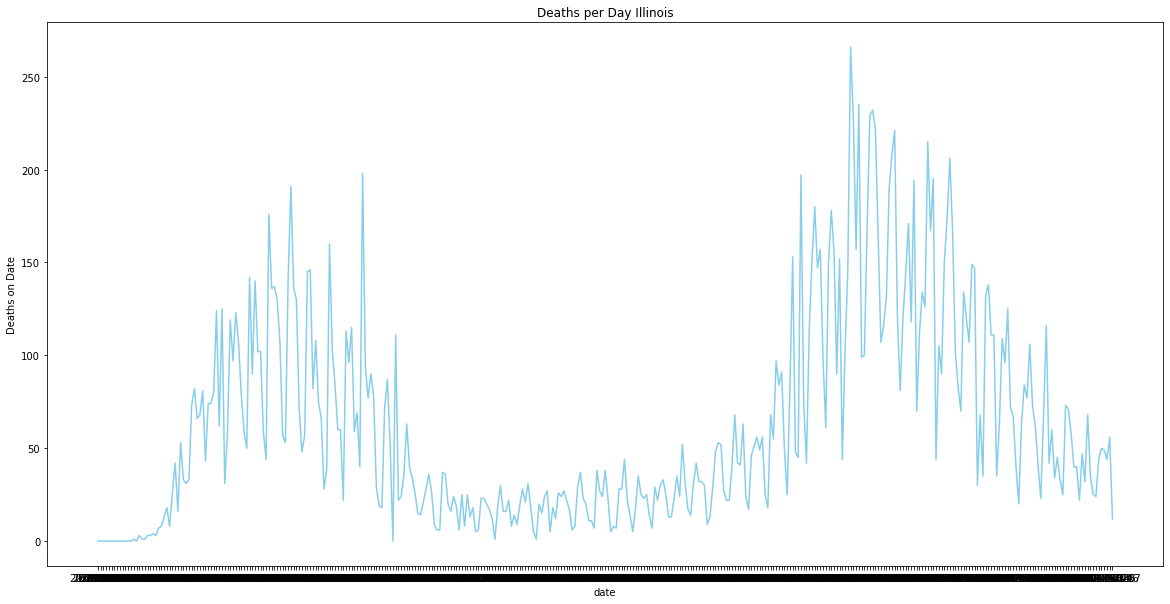

In [23]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x = test_stats["date"], y = test_stats['deathIncrease'], 
             color = "skyblue").set_title('Deaths per Day Illinois')

plt.ylabel("Deaths on Date")
plt.show(fig)

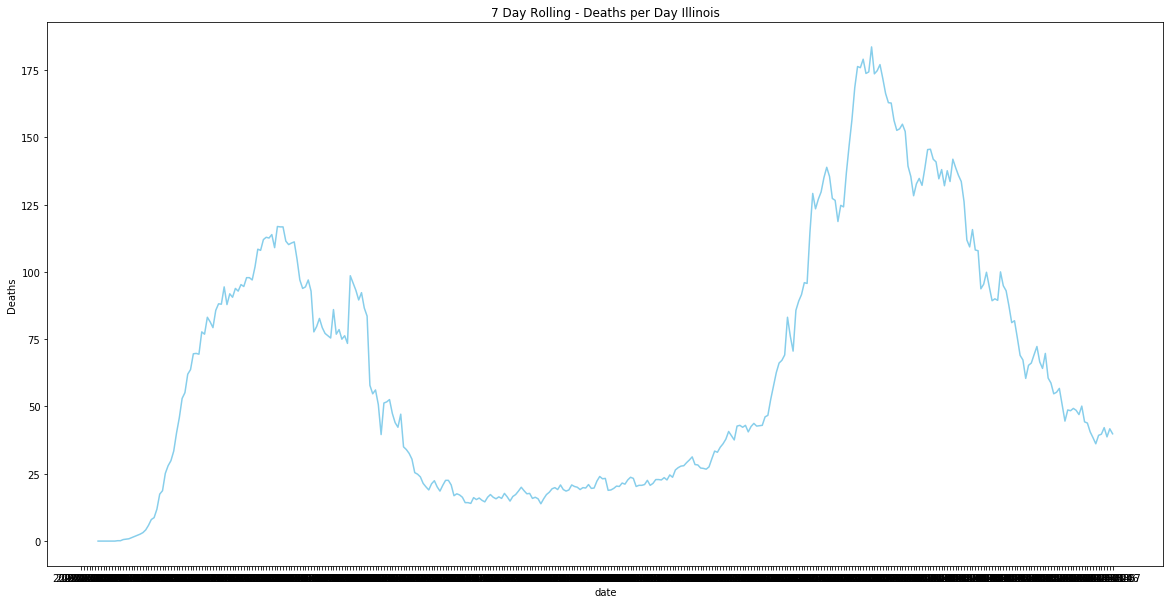

In [24]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x = test_stats["date"], y = test_stats['deathIncrease'].rolling(7).mean(), 
             color = "skyblue").set_title('7 Day Rolling - Deaths per Day Illinois')

plt.ylabel("Deaths")
plt.show(fig)